In [22]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [23]:
# TODO 每次绘图时修改数据来源文件
expr_res_data_path = '20230807_00_06_06_headup_detect_delay_test_new_0.3_0.7_tx2-cloud-raw.csv'

df = pd.read_csv(expr_res_data_path)
df = df[1:]
max_fps = 30
df.loc[df['fps'] >= 30, 'fps'] = max_fps
resolution_map = {"360p": 0, "480p": 1, "720p": 2, "1080p": 3}
df['resolution'] = df['resolution'].replace(resolution_map)

df

,n_loop,frame_id,total,up,fps,resolution,delay,face_detection,face_alignment
1,2,2.0,7,6,20,1,0.229594,host,host
2,3,3.0,7,6,20,1,0.227688,host,host
3,4,5.0,7,7,20,1,0.159068,host,host
4,5,7.0,7,6,20,1,0.152485,host,host
5,6,8.0,7,6,20,1,0.239528,host,host
...,...,...,...,...,...,...,...,...,...
1334,1335,2319.0,18,17,20,1,0.245499,cloud,cloud
1335,1336,2320.0,19,19,20,1,0.260952,cloud,cloud
1336,1337,2322.0,16,14,20,1,0.150005,cloud,cloud
1337,1338,2323.0,16,15,20,1,0.224257,cloud,cloud


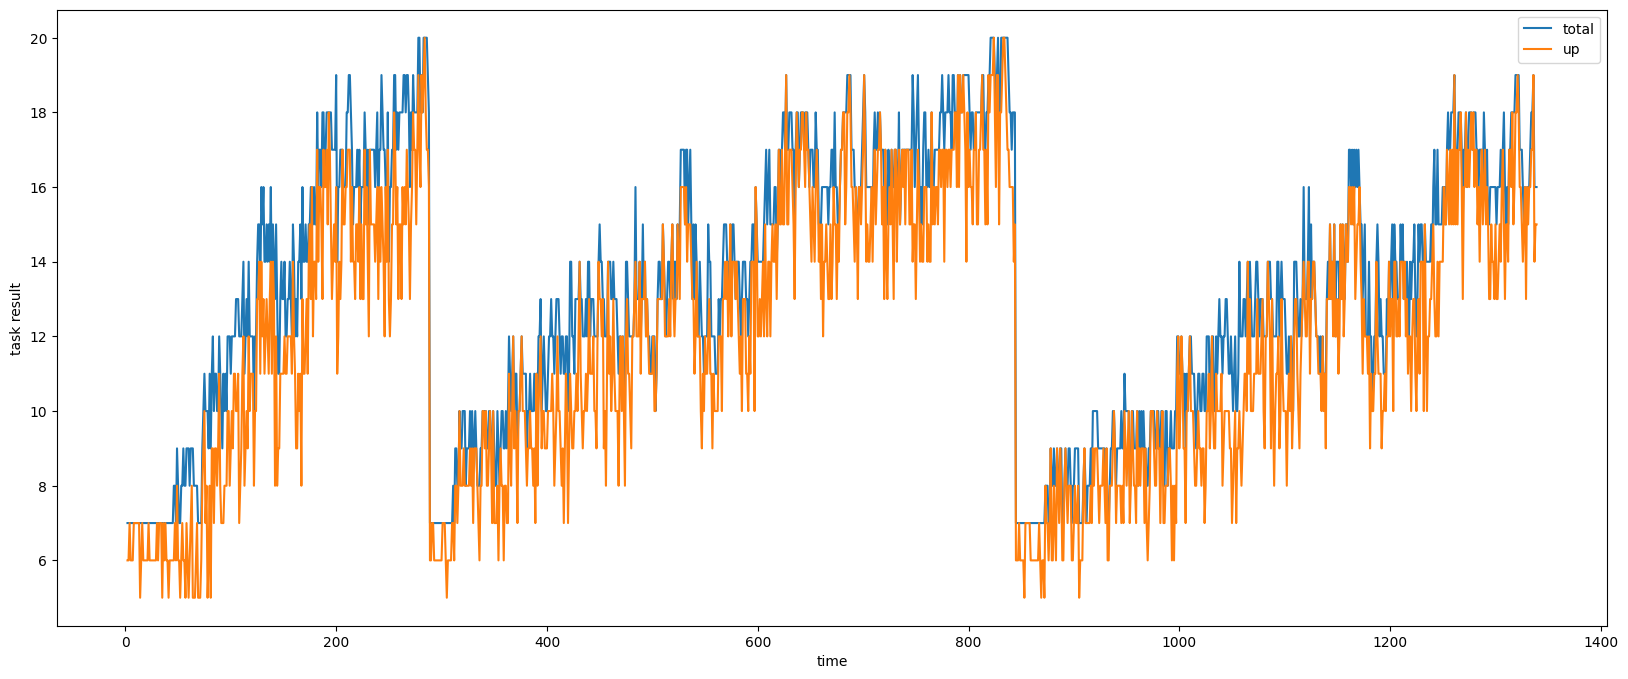

In [24]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.plot(df['n_loop'], df['total'], label='total')
ax.plot(df['n_loop'], df['up'], label='up')
# ax.title.set_text('total/up vs time')
plt.xlabel('time')
plt.ylabel('task result')
ax.legend()

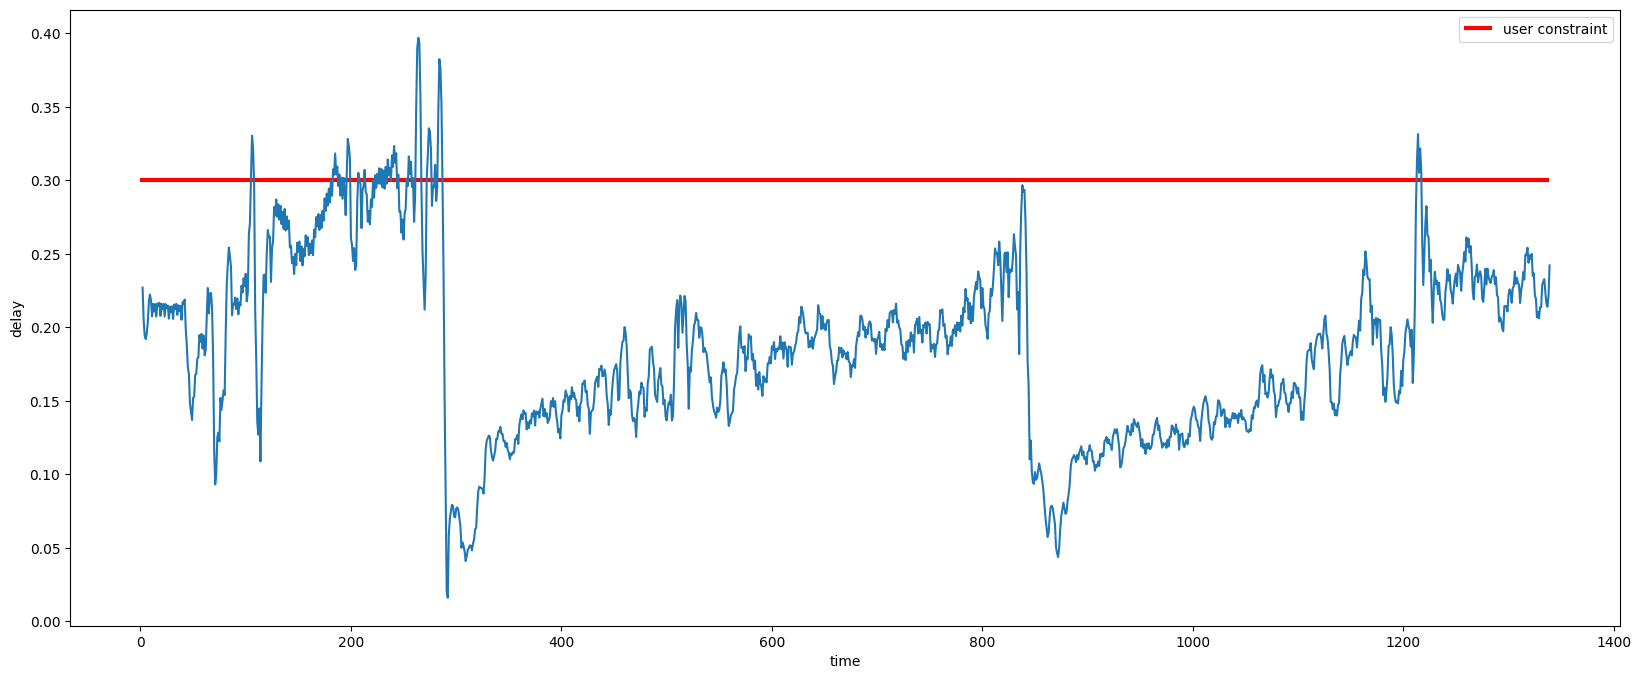

In [25]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.hlines(y=0.3, xmin=0, xmax=len(df['n_loop']), linewidth=3, color='r', label='user constraint')
ax.plot(df['n_loop'], scipy.signal.savgol_filter(df['delay'], 11, 3))
# ax.plot(df['n_loop'], df['delay'])
# ax.title.set_text('delay vs time')
plt.xlabel('time')
plt.ylabel('delay')
ax.legend()

Text(0, 0.5, 'frame rate')

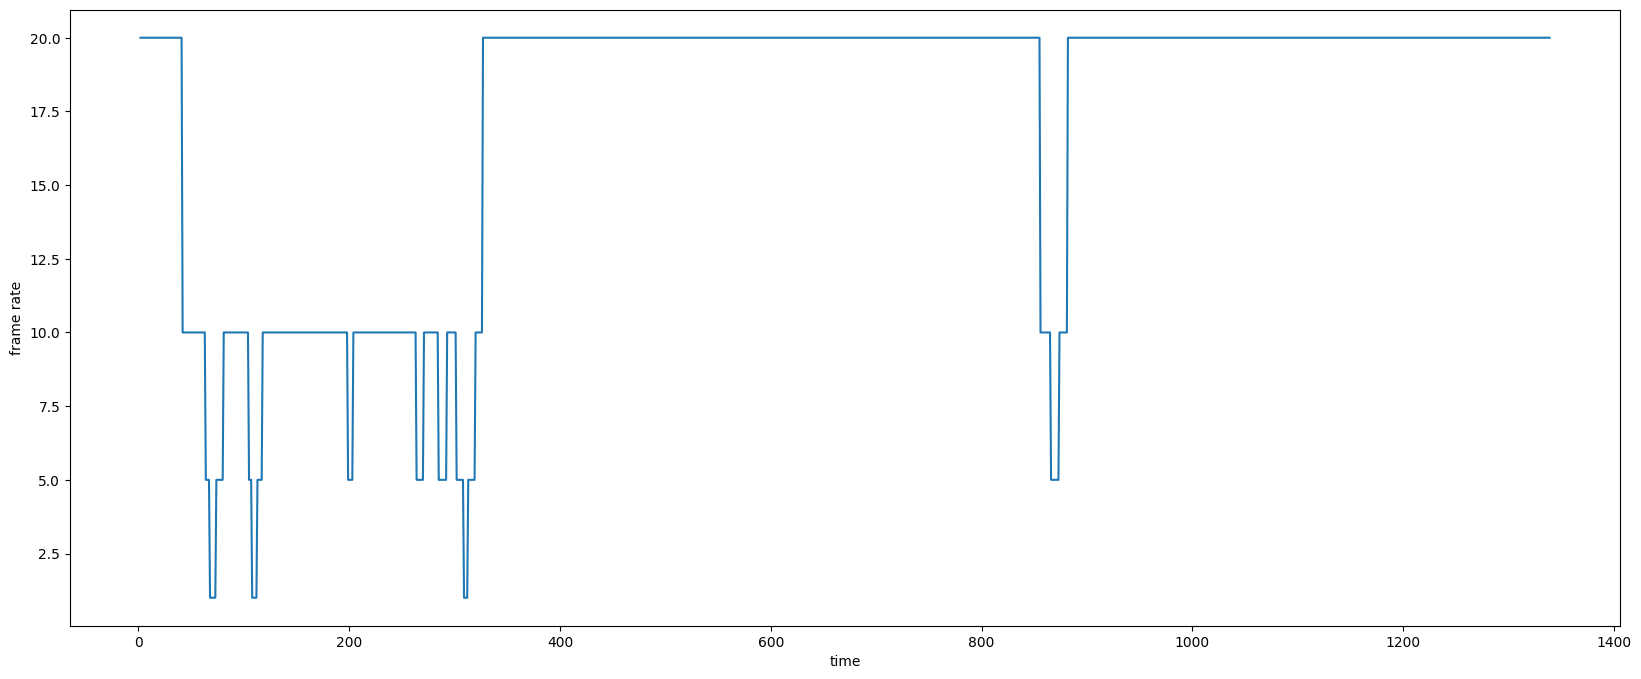

In [26]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.plot(df['n_loop'], df['fps'])
# ax.title.set_text('frame rate vs time')
plt.xlabel('time')
plt.ylabel('frame rate')

Text(0, 0.5, 'resolution')

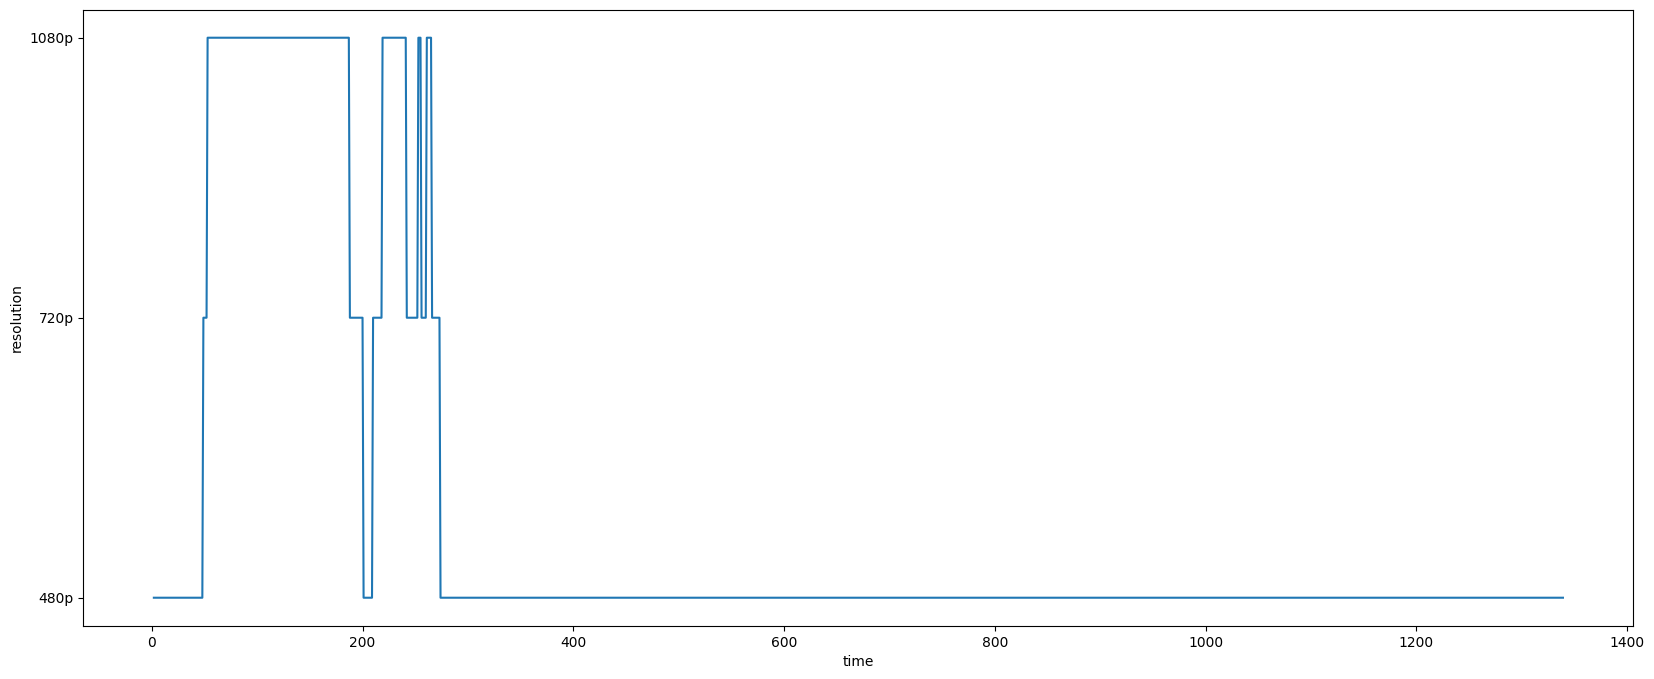

In [27]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.set_yticks(np.arange(4))
ax.set_yticklabels(resolution_map.keys())
ax.plot(df['n_loop'], df['resolution'])
# ax.title.set_text('resolution vs time')
plt.xlabel('time')
plt.ylabel('resolution')

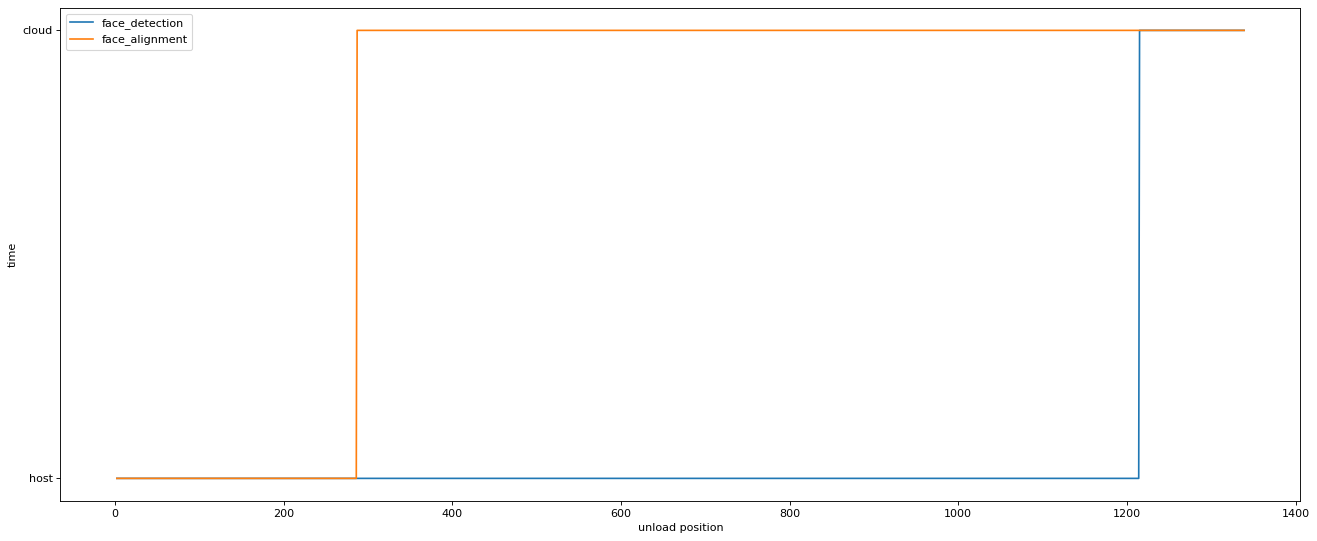

In [28]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=80)
ax.plot(df['n_loop'], df['face_detection'], label='face_detection')
ax.plot(df['n_loop'], df['face_alignment'], label='face_alignment')
# ax.title.set_text('unload position vs time')
plt.xlabel('unload position')
plt.ylabel('time')
ax.legend()